In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

*Примеры 1.1.1 - 1.1.3*

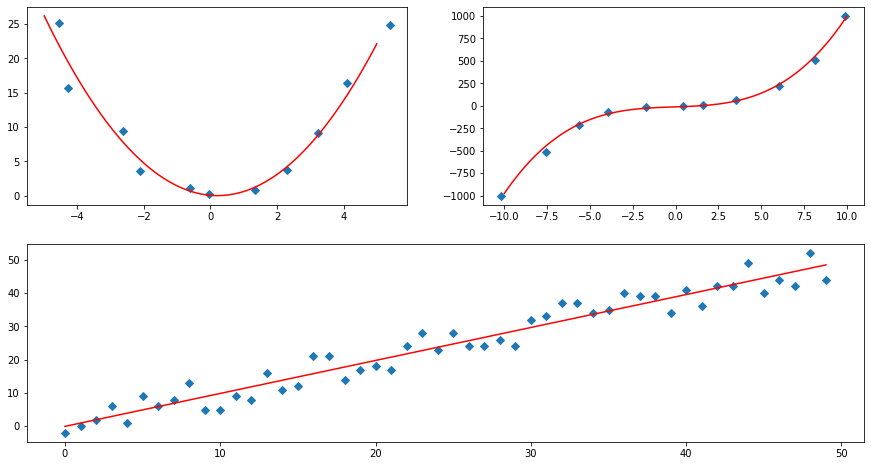

In [3]:
plt.figure(figsize=(15, 8))

x_p = np.linspace(-5, 5, 101)

#1
r = np.random.randint(-5, 6, 50)
x = np.array([i for i in range(0, 50)])
y = np.array([i + r[i] for i in range(0, 50)])

a = np.vstack([x, np.ones(len(x))]).T
k, b = np.linalg.lstsq(a, y, rcond= None)[0]

plt.subplot(212)
plt.plot(x, y, 'D')
plt.plot(x, k*x + b, 'r')

#2
x = np.linspace(-5, 5, 11)
y = x**2 + (np.random.rand(11)-0.5)
x += (np.random.rand(11)-0.5)

m = np.vstack([x**2, x, np.ones(11)]).T
a, b, c = np.linalg.lstsq(m, y, rcond=None)[0]

plt.subplot(221)
plt.plot(x, y, 'D')
plt.plot(x_p, a * x_p**2 + b * x_p + c, 'r')

#3
x = np.linspace(-10, 10, 11)
y = x**3 + (np.random.rand(11)-0.5)
x += (np.random.rand(11)-0.5)
x_p = np.linspace(-10, 10, 101)

m = np.vstack([x**3, x**2, x, np.ones(11)]).T
a, b, c, d = np.linalg.lstsq(m, y, rcond=None)[0]

plt.subplot(222)
plt.plot(x, y, 'D')
plt.plot(x_p, a * x_p**3 + b * x_p**2 + c * x_p + d, 'r')

plt.show()

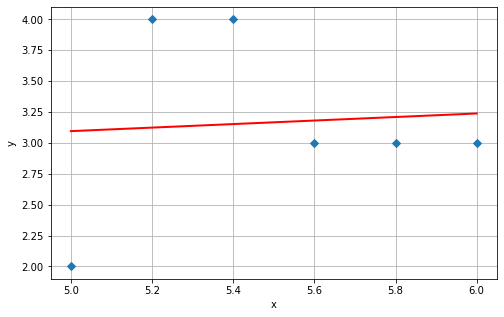

In [17]:
x = np.array([5, 5.2, 5.4, 5.6, 5.8, 6])
y = np.array([2, 4, 4, 3, 3, 3])


plt.figure(figsize=(8, 5))
plt.grid()

m = np.vstack([x, np.ones(len(x))]).T
a, b = np.linalg.lstsq(m, y, rcond= None)[0]

plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y, 'D')

plt.plot(x, a * x + b, 'r', linewidth=2)

plt.show()

**1.1**\
Подставьте собственные данные и поэкспериментируйте с представленными 
функциями. Проанализируйте динамику изменения данных.


In [8]:
data = pd.read_csv("https://raw.githubusercontent.com/akmand/datasets/main/credit_german.csv")
data = data.sort_values(by=["duration"])
display(data.head())
x = np.array(data["duration"])
y = np.array(data["credit_amount"])

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
314,'>=200',4,'existing paid','new car',1494,'no known savings','<1',1,'male single',none,...,'real estate',29,none,own,1,'unskilled resident',2,none,no,good
734,'no checking',4,'critical/other existing credit','new car',3380,'<100','4<=X<7',1,'female div/dep/mar',none,...,'real estate',37,none,own,1,skilled,2,none,yes,good
527,'no checking',4,'critical/other existing credit',radio/tv,1503,'<100','4<=X<7',2,'male single',none,...,'real estate',42,none,own,2,'unskilled resident',2,none,yes,good
943,'no checking',4,'critical/other existing credit','new car',1455,'<100','4<=X<7',2,'male single',none,...,'real estate',42,none,own,3,'unskilled resident',2,none,yes,good
837,'no checking',4,'existing paid',furniture/equipment,601,'<100','<1',1,'female div/dep/mar',none,...,'real estate',23,none,rent,1,'unskilled resident',2,none,yes,good


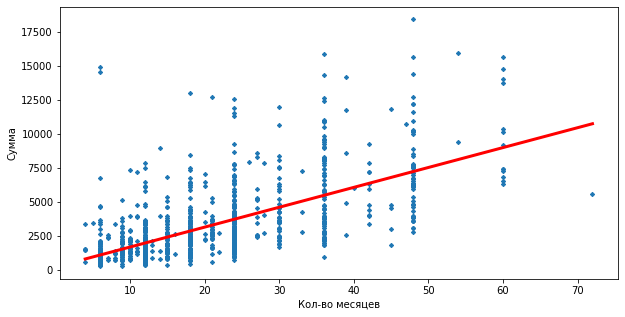

In [ ]:
plt.figure(figsize=(10, 5))

m = np.vstack([x, np.ones(len(x))]).T
a, b = np.linalg.lstsq(m, y, rcond= None)[0]

plt.xlabel("Кол-во месяцев")
plt.ylabel("Сумма")
plt.plot(x, y, 'D', markersize=3)

plt.plot(x, a * x + b, 'r', linewidth=3)

plt.show()

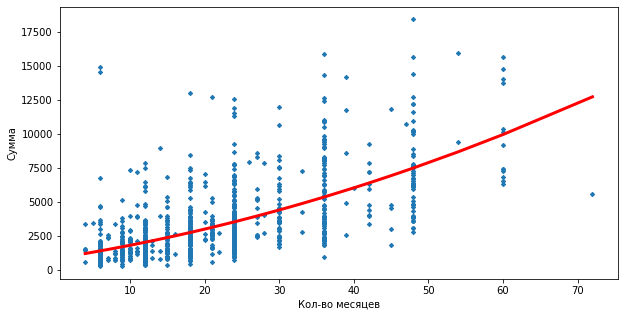

In [ ]:
plt.figure(figsize=(10, 5))

m = np.vstack([x**2, x, np.ones(len(x))]).T
a, b, c = np.linalg.lstsq(m, y, rcond=None)[0]

plt.xlabel("Кол-во месяцев")
plt.ylabel("Сумма")
plt.plot(x, y, 'D', markersize=3)

plt.plot(x, a * x**2 + b * x + c, 'r', linewidth=3)

plt.show()

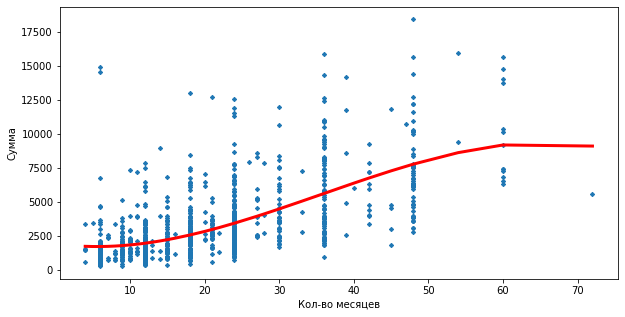

In [ ]:
plt.figure(figsize=(10, 5))

m = np.vstack([x**3, x**2, x, np.ones(len(x))]).T
a, b, c, d = np.linalg.lstsq(m, y, rcond=None)[0]

plt.xlabel("Кол-во месяцев")
plt.ylabel("Сумма")
plt.plot(x, y, 'D', markersize=3)

plt.plot(x, a * x**3 + b * x**2 + c * x + d, 'r', linewidth = 3)

plt.show()

In [ ]:
from scipy.optimize import curve_fit
import math as m

k = 0.05
x_data = np.linspace(0, 5, 50)
beta = (0.25, 0.75, 0.5)

def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

In [ ]:
y = f(x_data, *beta)
y_data = y + k * np.random.randn(len(x_data))

beta_opt, beta_cov = curve_fit(f, x_data, y_data)

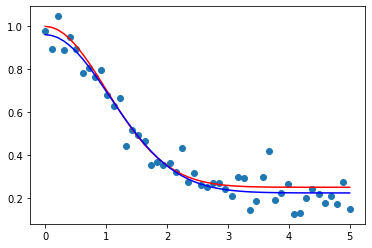

In [ ]:
plt.scatter(x_data, y_data)
plt.plot(x_data, y, 'r')
plt.plot(x_data, f(x_data, *beta_opt), 'b')
plt.show()

In [ ]:
beta = (0.25, 0.75)

def f(x, b0, b1):
    return b0 + b1 * x

y = f(x_data, *beta)
y_data = y + k * np.random.randn(len(x_data))

beta_opt, beta_cov = curve_fit(f, x_data, y_data)

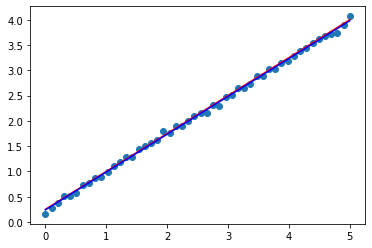

In [ ]:
plt.scatter(x_data, y_data)
plt.plot(x_data, y, 'r')
plt.plot(x_data, f(x_data, *beta_opt), 'b')
plt.show()

In [ ]:
beta = (0.25, 0.75, 0.5)

def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x

y = f(x_data, *beta)
y_data = y + k * np.random.randn(len(x_data))

beta_opt, beta_cov = curve_fit(f, x_data, y_data)


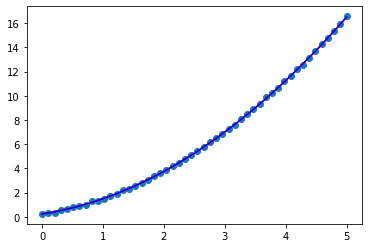

In [ ]:
plt.scatter(x_data, y_data)
plt.plot(x_data, y, 'r')
plt.plot(x_data, f(x_data, *beta_opt), 'b')
plt.show()

In [ ]:
beta = (0.25, 0.75)
x_data = np.linspace(0.1, 5, 50)

def f(x, b0, b1):
    return b0 + b1 * np.log(x)

y = f(x_data, *beta)
y_data = y + k * np.random.randn(len(x_data))

beta_opt, beta_cov = curve_fit(f, x_data, y_data)

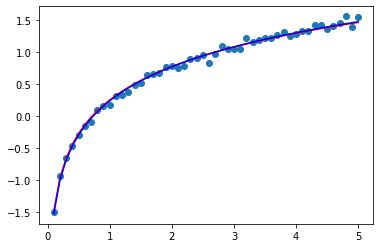

In [ ]:
plt.scatter(x_data, y_data)
plt.plot(x_data, y, 'r')
plt.plot(x_data, f(x_data, *beta_opt), 'b')
plt.show()

In [ ]:
beta = (1, 2)
def f(x, b0, b1):
    return b0 * x**b1

y = f(x_data, *beta)
y_data = y + k * np.random.randn(len(x_data))

beta_opt, beta_cov = curve_fit(f, x_data, y_data)

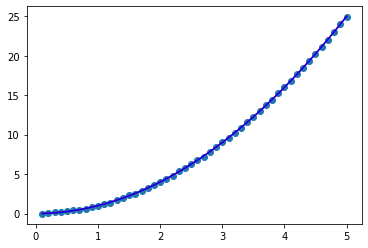

In [ ]:
plt.scatter(x_data, y_data)
plt.plot(x_data, y, 'r')
plt.plot(x_data, f(x_data, *beta_opt), 'b')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
a = np.linspace(10, 100, 20)
a = a + np.random.randint(-10, 10, 20)
a

array([13.        , 13.73684211, 14.47368421, 16.21052632, 22.94736842,
       23.68421053, 36.42105263, 42.15789474, 41.89473684, 49.63157895,
       50.36842105, 58.10526316, 56.84210526, 71.57894737, 80.31578947,
       84.05263158, 78.78947368, 84.52631579, 99.26315789, 92.        ])

In [ ]:
d = {
    "Учебное время": np.linspace(0.5, 5.5, 20),
    "Оценка": a
}
dataSet = pd.DataFrame(d)
dataSet.head()

,Учебное время,Оценка
0,0.500000,13.000000
1,0.763158,13.736842
2,1.026316,14.473684
3,1.289474,16.210526
4,1.552632,22.947368


In [ ]:
print(dataSet.shape)
dataSet.describe()

(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,3.000000,51.500000
std,1.556863,28.697727
min,0.500000,13.000000
25%,1.750000,23.500000
50%,3.000000,50.000000
75%,4.250000,79.171053
max,5.500000,99.263158


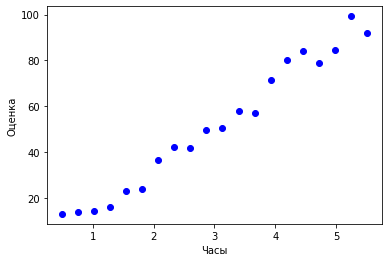

In [ ]:
plt.scatter(dataSet["Учебное время"], dataSet["Оценка"], color = 'b', label = "Данные экзаамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

In [ ]:
x = dataSet.iloc[:, :-1].values
y = dataSet.iloc[:, 1].values
print(x, '\n', y)

[[0.5       ]
 [0.76315789]
 [1.02631579]
 [1.28947368]
 [1.55263158]
 [1.81578947]
 [2.07894737]
 [2.34210526]
 [2.60526316]
 [2.86842105]
 [3.13157895]
 [3.39473684]
 [3.65789474]
 [3.92105263]
 [4.18421053]
 [4.44736842]
 [4.71052632]
 [4.97368421]
 [5.23684211]
 [5.5       ]] 
 [13.         13.73684211 14.47368421 16.21052632 22.94736842 23.68421053
 36.42105263 42.15789474 41.89473684 49.63157895 50.36842105 58.10526316
 56.84210526 71.57894737 80.31578947 84.05263158 78.78947368 84.52631579
 99.26315789 92.        ]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print(regressor.intercept_, '\n', regressor.coef_)

-3.458726415094361 
 [18.26886792]


In [ ]:
y_pred = regressor.predict(x_test)

df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})
df

,Actual,Predicted
0,99.263158,92.212450
1,13.736842,10.483304
2,92.000000,97.020047
3,41.894737,44.136482


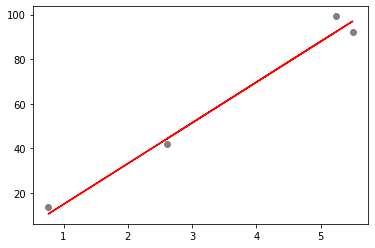

In [ ]:
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, 'r')
plt.show()

Постройте модель линейной регрессии для произвольных данных из двух 
столбцов. Для примера можно взять точечную зависимость заработной платы от 
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv). 
Найдите коэффициенты линии регрессии. Постройте прогноз.

In [ ]:
dataSet = pd.read_csv("https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv")
dataSet.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


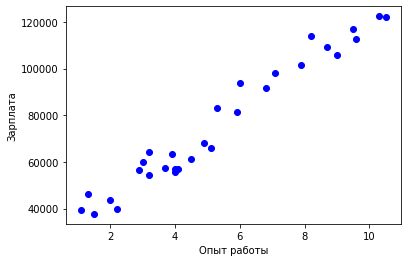

In [ ]:
plt.scatter(dataSet["YearsExperience"], dataSet["Salary"], color = 'b', label = "Данные экзаамена")
plt.xlabel("Опыт работы")
plt.ylabel("Зарплата")
plt.show()

In [ ]:
x = dataSet.iloc[:, :-1].values
y = dataSet.iloc[:, 1].values
print(x, '\n', y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]] 
 [ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print(regressor.intercept_, '\n', regressor.coef_)

26780.09915062818 
 [9312.57512673]


In [ ]:
y_pred = regressor.predict(x_test)

df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})
df

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


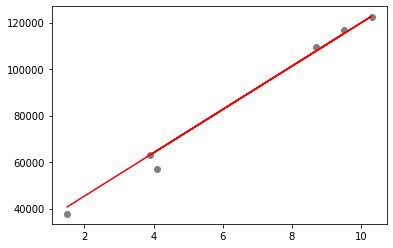

In [ ]:
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, 'r')
plt.show()

In [ ]:
y = np.random.randint(1, 6 + 1, 20)
x = np.random.randint(1, 6 + 1, (3, 20))
x = x.T
x = np.c_[x, np.ones(x.shape[0])]
linreg = np.linalg.lstsq(x, y, rcond=None)[0]
print(linreg)

[-0.09879526  0.06937992  0.38018685  2.06426701]


In [ ]:
from sklearn import metrics

In [ ]:
y = np.random.randint(1, 6 + 1, 20)
x = np.random.randint(1, 6 + 1, (3, 20))

new_y = np.array(y).T
df1 = pd.DataFrame(new_y)

new_x = np.array(x).T
df2 = pd.DataFrame(new_x)

df1 = df1.rename(columns = {0: 'y'}, inplace = False)
df2 = df2.rename(columns = {0: 'x1', 1: 'x2', 2: 'x3'}, inplace = False)

frames = [df1, df2]

dataset = pd.concat([df1, df2], axis=1, join='inner')
display(dataset.head())
print(dataset.shape)
display(dataset.describe())

,y,x1,x2,x3
0,2,4,3,5
1,2,2,4,3
2,5,5,4,2
3,1,3,4,5
4,2,4,4,4


(20, 4)


,y,x1,x2,x3
count,20.000000,20.000000,20.0000,20.000000
mean,3.100000,3.650000,3.1500,3.950000
std,1.447321,1.496487,1.7252,1.605091
min,1.000000,1.000000,1.0000,1.000000
25%,2.000000,2.750000,1.0000,2.750000
50%,3.000000,4.000000,3.5000,4.000000
75%,4.000000,5.000000,4.0000,5.000000
max,6.000000,6.000000,6.0000,6.000000


In [ ]:
x = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

regressor = LinearRegression() 
regressor.fit(x_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
display(coeff_df)

y_pred = regressor.predict(x_test)
df = pd.DataFrame(
    {
        'Actual': y_test, 
        'Predicted': y_pred
    })
display(df)

,Coefficient
x1,0.071673
x2,0.030297
x3,-0.426109


,Actual,Predicted
18,3,4.030030
1,2,3.479792
19,3,2.375109
8,3,2.465010


In [ ]:
print(
    'Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)
)


Mean Squared Error: 0.9818622664934802


Постройте модель множественной линейной регрессии для произвольных 
данных из нескольких столбцов. Для примера можно взять потребления 
газа (в миллионах галлонов) в 48 штатах США или набор данных о 
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты 
множественной регрессии. Постройте прогноз.


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv")

x = data[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y = data['Petrol_Consumption']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

regressor = LinearRegression() 
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient']) 
display(coeff_df)

y_pred = regressor.predict(X_test) 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
display(df)

print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))


,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


Mean Squared Error: 4666.344787588363


Экспериментально получены N − значений величины Y при 
различных значениях величины X. Построить полиномы первой и второй 
степени, аппроксимирующие результаты эксперимента, с применением 
метода наименьших квадратов. Результаты выводятся в виде таблиц 
значений и графиков, полученных полиномов.

Вариант 10
x =  [0.  0.2 0.4 0.6 0.8 1. ]
y =  [4.28571429 4.17142857 4.05714286 3.94285714 3.82857143 3.71428571]


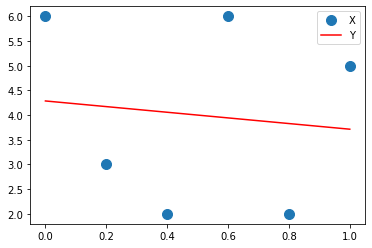

x =  [0.  0.2 0.4 0.6 0.8 1. ]
y =  [22.         10.08571429  3.95714286  3.61428571  9.05714286 20.28571429]


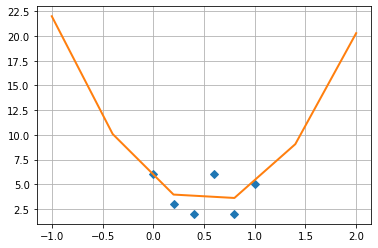

In [ ]:
print('Вариант 10')

x = np.linspace(0, 1, 6)
y = np.array([6, 3, 2, 6, 2, 5])

A = np.vstack([x, np.ones(len(x))]).T

m, c = np.linalg.lstsq(A, y, rcond = None)[0]

print('x = ', x)
print('y = ', m*x +c)

plt.plot(x, y, 'o', label='X', markersize=10)
plt.plot(x, m * x + c, 'r', label='Y')
plt.legend()
plt.show()

m = np.vstack((x**2, x, np.ones(6))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = np.linspace(-1, 2, 6)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0]*x_prec**2+s[1]*x_prec+s[2], '-', lw=2)
plt.grid()

print('x = ', x)
print('y = ', s[0]*x_prec**2+s[1]*x_prec+s[2])